## Creating a scene with Ball and Plane (show plane, background, camera pose) 

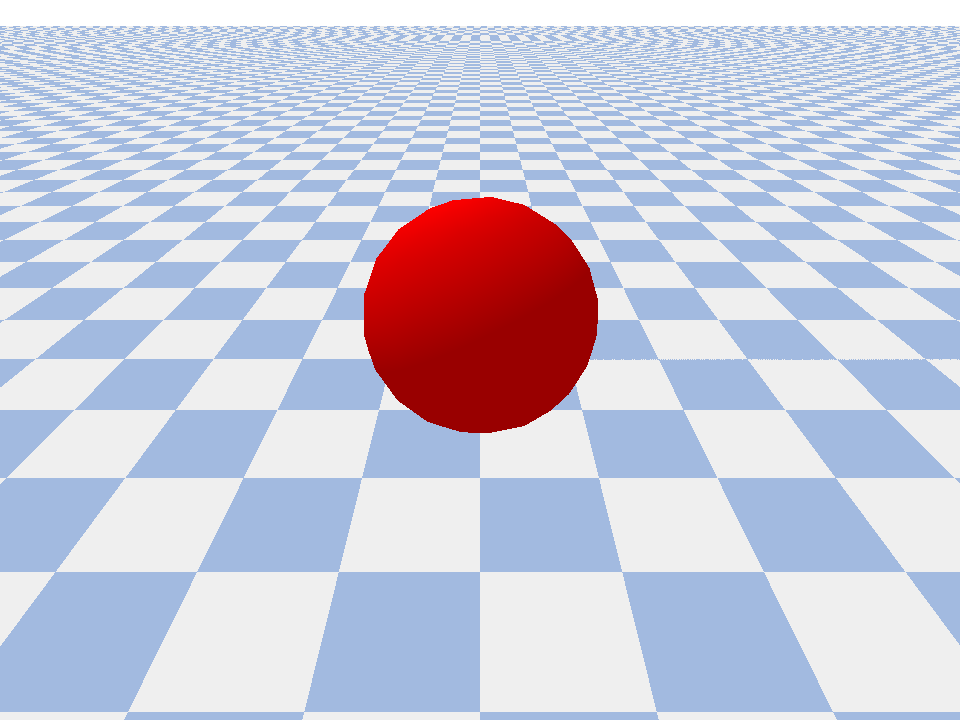

In [2]:
import bayes3d.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()
position = np.array([0, -3, 2])
sphere = pbs.create_sphere(position, 0.25) 
scene.add_body(sphere)
image = scene.render(pbs.pybullet_render) 
image


## Creating a scene with custom mesh (custom mesh)

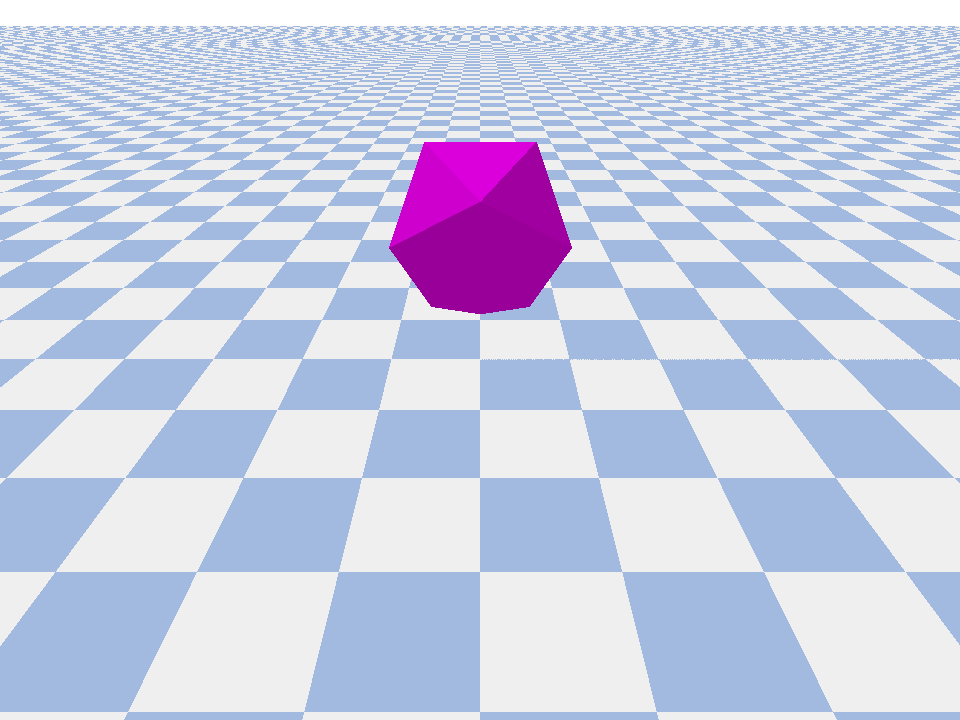

In [6]:
import bayes3d.pybullet_sim as pbs
import numpy as np

path_to_mesh = "../assets/sample_objs/icosahedron.obj"

scene = pbs.Scene()
d20_position = np.array([0, 0, 1.5])
d20 = pbs.make_body_from_obj(path_to_mesh, d20_position, id = "d20")
d20.set_color([1,0,1])
scene.add_body(d20)
scene.render(pbs.pybullet_render)

## Adjusting mesh scaling

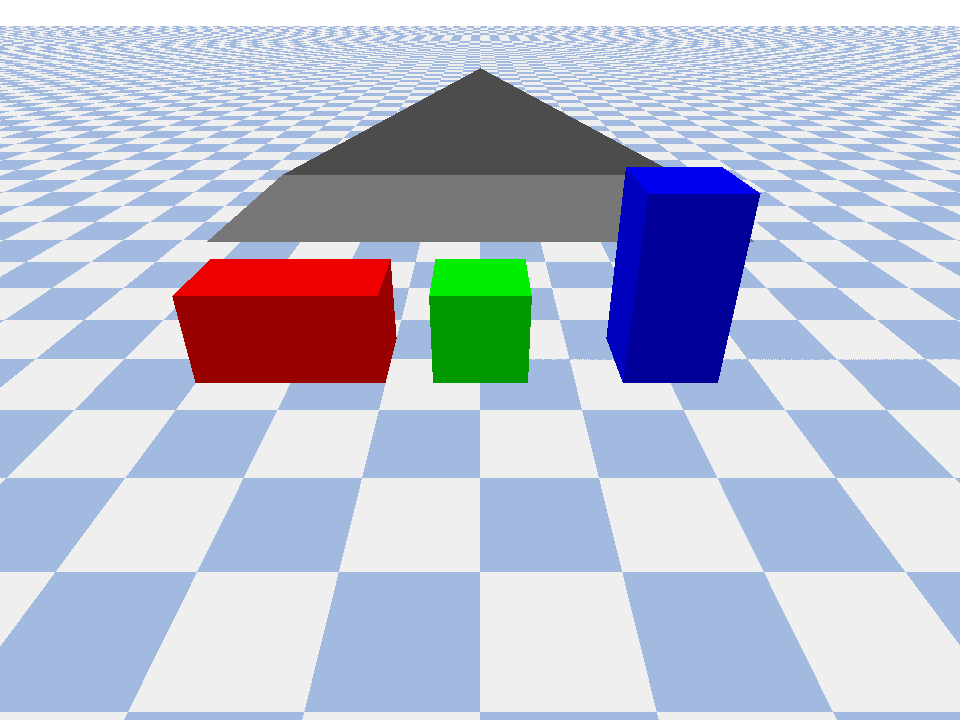

In [19]:
import bayes3d.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

# default cube, length 1 at origin 
original_cube = pbs.create_box(np.array([0,0,0.5]), id="original_cube")
original_cube.set_color([0,1,0])

# wide box, set scale after construction 
second_cube = pbs.create_box(np.array([-2,0,0.5]), id="second_cube")
second_cube.set_color([1,0,0])
second_cube.set_scale(np.array([2,1,1]))

# tall box, can set scale at construction
third_cube = pbs.create_box(np.array([2,0,1]), np.array([1,1,2]), id="third_cube")
third_cube.set_color([0,0,1])

# custom obj, large scale 
diamond = pbs.make_body_from_obj("../assets/sample_objs/pyramid.obj", np.array([0,2,2]), id="diamond")
diamond.set_scale(np.array([6,3,1]))
diamond.set_color([.5,.5,.5])

scene.add_body(original_cube)
scene.add_body(second_cube)
scene.add_body(third_cube)
scene.add_body(diamond)
scene.render(pbs.pybullet_render)


## Adjusting Orientations 

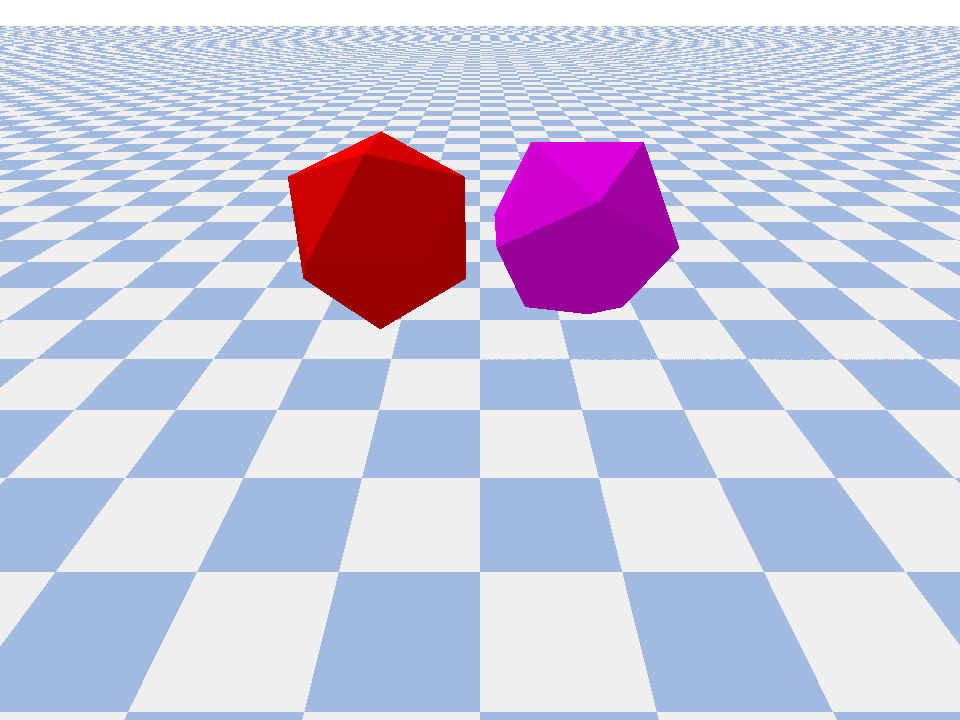

In [2]:
import bayes3d.pybullet_sim as pbs
import numpy as np

path_to_mesh = "../assets/sample_objs/icosahedron.obj"

scene = pbs.Scene()
d20_position = np.array([1, 0, 1.5])   
rotated_position = np.array([-1, 0, 1.5]) 
d20 = pbs.make_body_from_obj(path_to_mesh, d20_position, id = "d20")

rotated = pbs.make_body_from_obj(path_to_mesh, rotated_position, id = "rotated")

sample_rotation = np.array([[0, 0, 1], [0, 1, 0], [-1, 0, 0]])
rotated.set_orientation(sample_rotation)

d20.set_color([1,0,1])
scene.add_bodies([d20, rotated])
scene.render(pbs.pybullet_render)


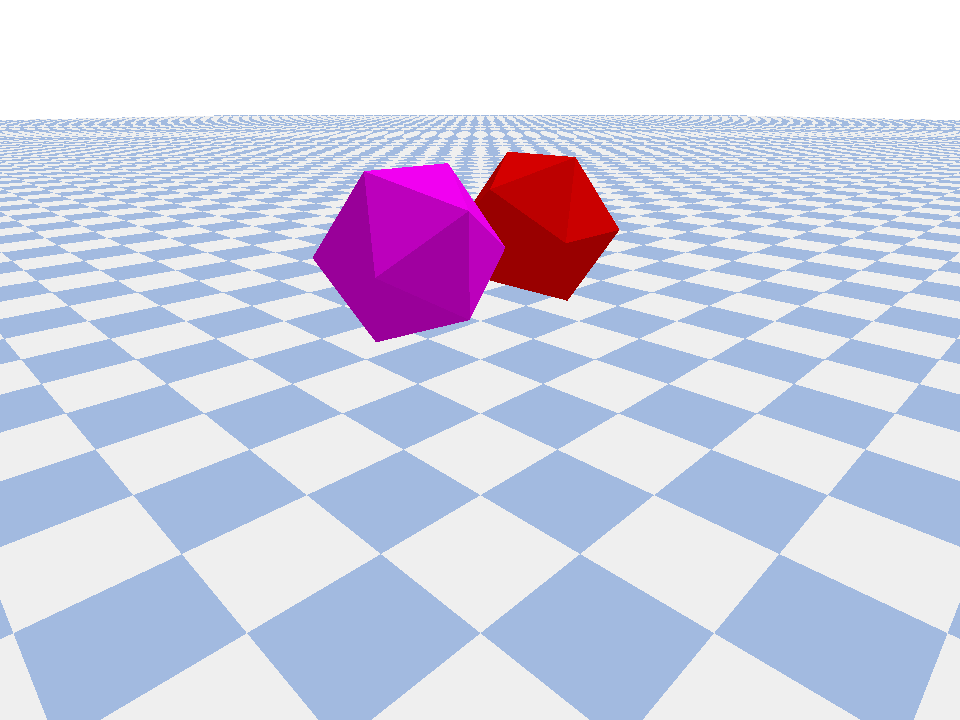

In [2]:
# new camera position
camera_position = np.array([5, 5, 3])
camera_target = np.array([0, 0, 0])
scene.set_camera_position_target(camera_position, camera_target)
scene.render(pbs.pybullet_render)

## Simple Simulation: Balls colliding (simulation, pybullet class, object poses)

In [1]:
import bayes3d.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()
scene.set_gravity(-10)
sphere_position1 = [-1, 0, 1]
sphere_start_velocity1 = [5, 0, 0]
sphere_position2 = [1, 0, 1]
sphere_start_velocity2 = [-5, 0, 0]
sphere1 = pbs.create_sphere(sphere_position1, 0.5,id = "sphere1")
sphere1.set_velocity(sphere_start_velocity1)
sphere1.set_color([0,1,1])
sphere2 = pbs.create_sphere(sphere_position2, 0.5, "sphere2")
sphere2.set_velocity(sphere_start_velocity2)

scene.add_bodies([sphere1, sphere2])

pyb_sim = scene.simulate(100) 
pyb_sim.create_gif("sphere_collision.gif")

pybullet build time: Jun 12 2023 15:17:43


## Simple Simulation: Balls Bouncing (restitution, gravity) 

In [3]:
import bayes3d.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

#create spheres of varying restitution
sphere1 = pbs.create_sphere(np.array([0, 0, 3]), 0.5, id = "regular_ball")
sphere1.set_color([1,0,0])
sphere1.set_restitution(0.6)
sphere1.set_velocity([0,0,-2])

sphere2 = pbs.create_sphere(np.array([2, 0, 3]), 0.5, id = "bouncy_ball")
sphere2.set_color([0,1,0])
sphere2.set_restitution(1)
sphere2.set_velocity([0,0,-2])

sphere3 = pbs.create_sphere(np.array([-2, 0, 3]), 0.5, id = "flat_ball")
sphere3.set_color([0,0,1])
sphere3.set_restitution(0)
sphere3.set_velocity([0,0,-2])

scene.add_bodies([sphere1, sphere2, sphere3])

# Can set scene gravity 
scene.set_gravity(-10)

# Can set fps 
pyb_sim = scene.simulate(120)
pyb_sim.create_gif("restitution.gif", 30)

## Simple Simulation: Balls Rolling (friction, damping)

In [1]:
import bayes3d.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene() 
path_to_d20 = "../assets/sample_objs/icosahedron.obj"
sphere = pbs.create_sphere(np.array([-4,0,1]), scale = [1,1,1], id = "regular_sphere", friction = 1, velocity = [10,0,0])
d20 = pbs.make_body_from_obj(path_to_d20, np.array([-4,1,1]), id = "d20", friction = 1, velocity = [10,0,0])
d20.set_color([1,0,1])
d20.set_scale = np.array([.6,.6,.6])
scene.add_bodies([sphere, d20])

scene.set_gravity(-10)

pyb_sim = scene.simulate(120)
pyb_sim.create_gif("rolling.gif", 30)

pybullet build time: Jun 12 2023 15:17:43
